In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/My Drive/Colab Notebooks/AllOil.xlsx'
df = pd.read_excel(path)

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Mean Squared Error: 34670046.22961556
R-squared: 0.8937803371788329
Overall MAPE: 22.13292773486627%
Overall MAE: 2763.343111191402


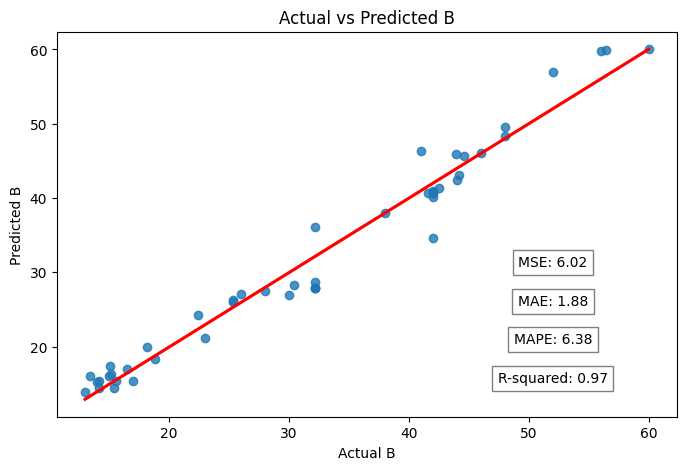

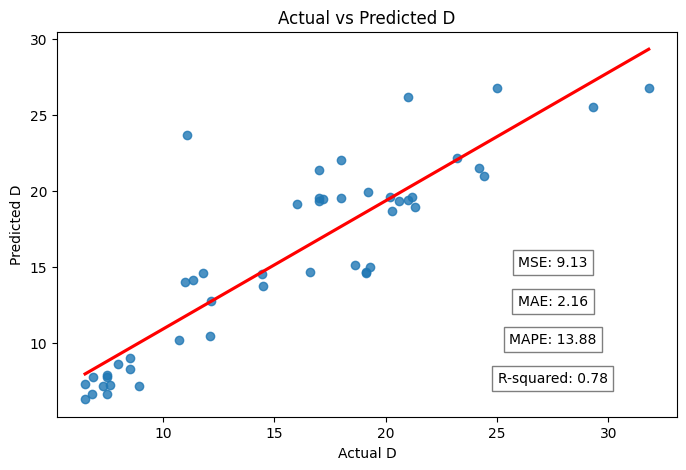

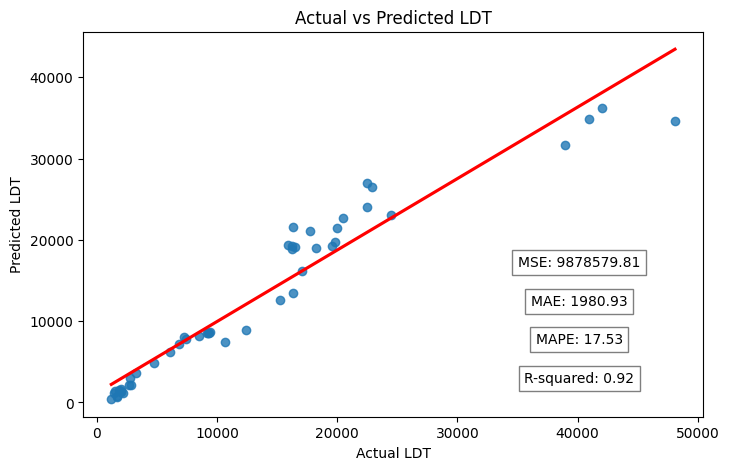

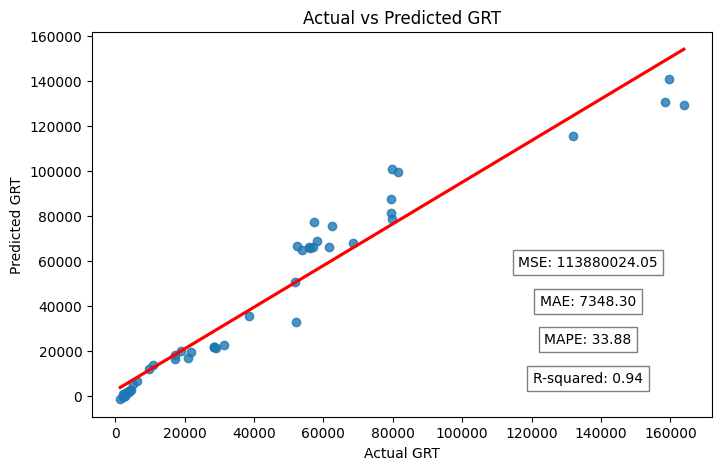

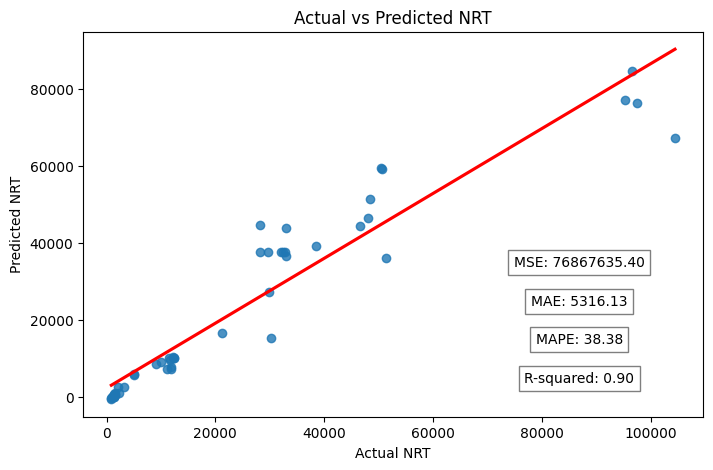

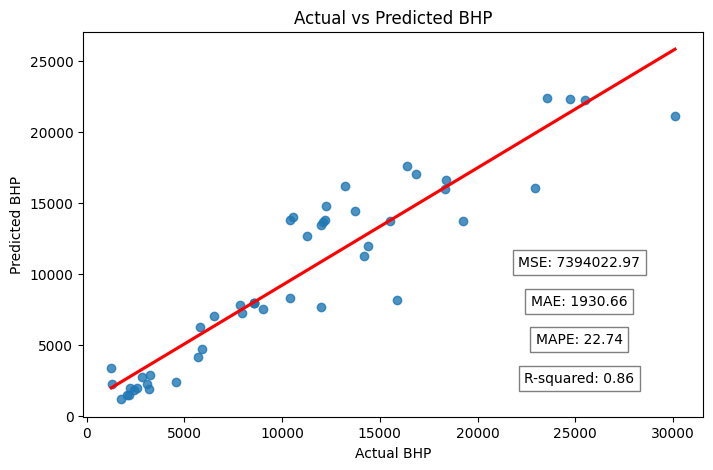

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df[['LOA', 'DWT']]
y = df[['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
overall_mape = mape.mean()
mae = mean_absolute_error(y_test, y_pred)

# Display the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Overall MAPE: {overall_mape}%')
print(f'Overall MAE: {mae}')

def calculate_metrics(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    return mape, mae, mse

# Actual vs. Predicted values
for i, col in enumerate(['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']):
    plt.figure(figsize=(8, 5))
    sns.regplot(x=y_test[col], y=y_pred[:, i], ci=None, line_kws={'color': 'red'})
    plt.xlabel(f'Actual {col}')
    plt.ylabel(f'Predicted {col}')
    plt.title(f'Actual vs Predicted {col}')
# Calculate R-squared, MAPE, MAE, MSE values
    r2 = r2_score(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.1, f'R-squared: {r2:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    mape, mae, mse = calculate_metrics(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.2, f'MAPE: {mape:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.3, f'MAE: {mae:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.4, f'MSE: {mse:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Mean Squared Error: 8852592.460915567
R-squared: 0.9311139073298232
Overall MAPE: 12.76819715194735%
Overall MAE: 1439.9235013326322


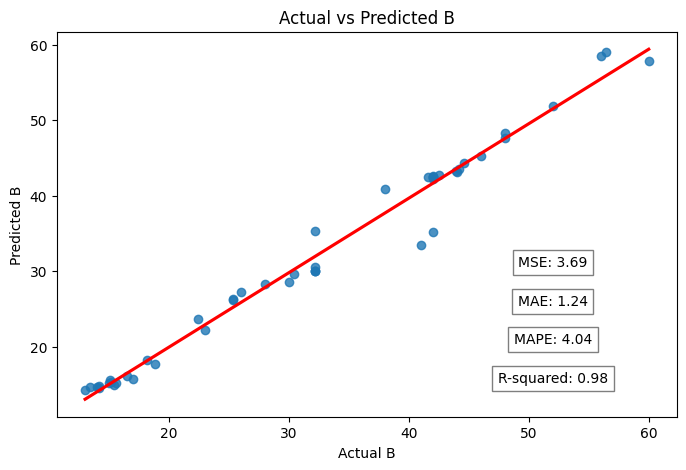

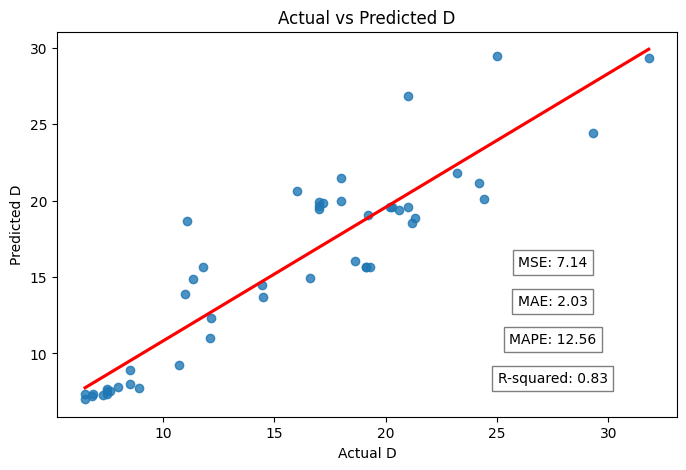

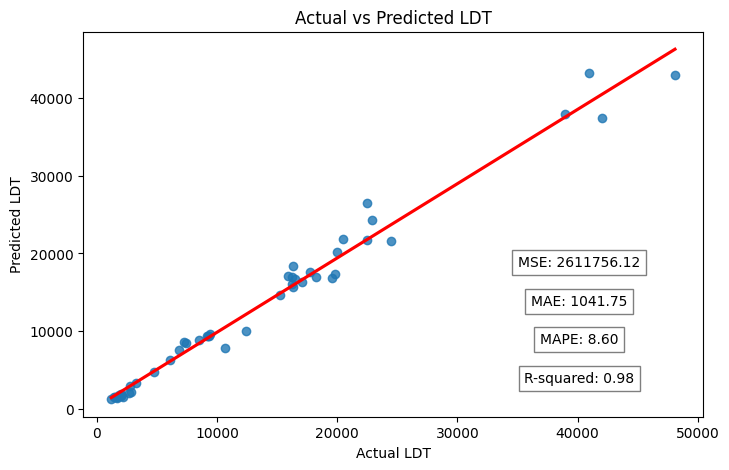

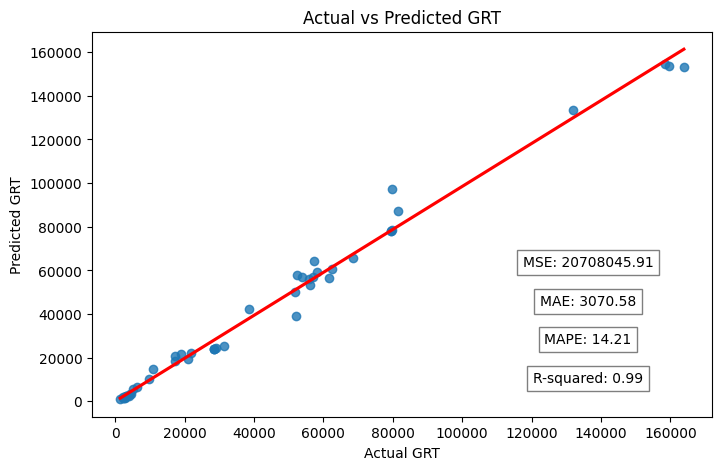

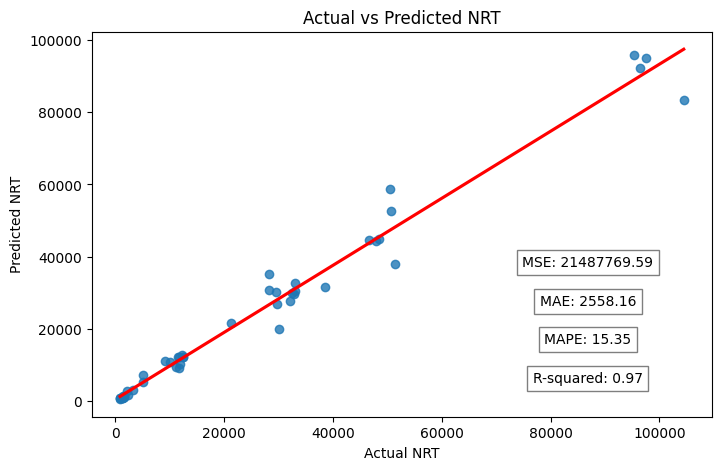

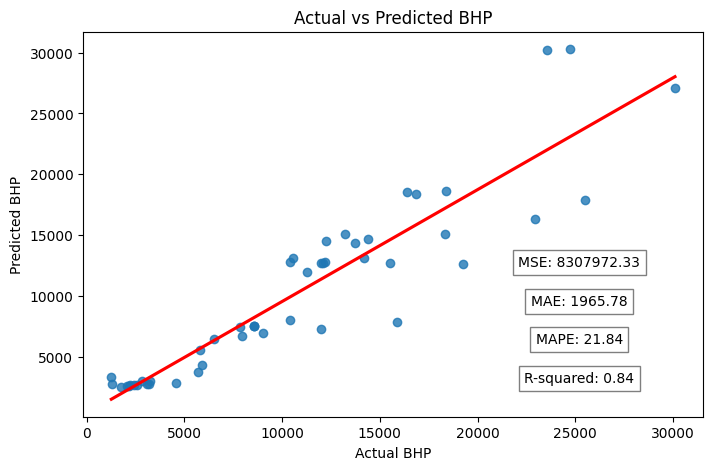

In [4]:
from sklearn.preprocessing import PolynomialFeatures

# Selecting features and target
X = df[['LOA', 'DWT']]
y = df[['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
overall_mape = mape.mean()
mae = mean_absolute_error(y_test, y_pred)

# Display the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Overall MAPE: {overall_mape}%')
print(f'Overall MAE: {mae}')

# Actual vs. Predicted values
for i, col in enumerate(['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']):
    plt.figure(figsize=(8, 5))
    sns.regplot(x=y_test[col], y=y_pred[:, i], ci=None, line_kws={'color': 'red'})
    plt.xlabel(f'Actual {col}')
    plt.ylabel(f'Predicted {col}')
    plt.title(f'Actual vs Predicted {col}')

    # Calculate R-squared, MAPE, MAE, MSE values
    r2 = r2_score(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.1, f'R-squared: {r2:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    mape, mae, mse = calculate_metrics(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.2, f'MAPE: {mape:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.3, f'MAE: {mae:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.4, f'MSE: {mse:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

    plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Mean Squared Error: 28945400.917652816
R-squared: 0.869629717375016
Overall MAPE: 13.115748511737069%
Overall MAE: 1801.3715746527776


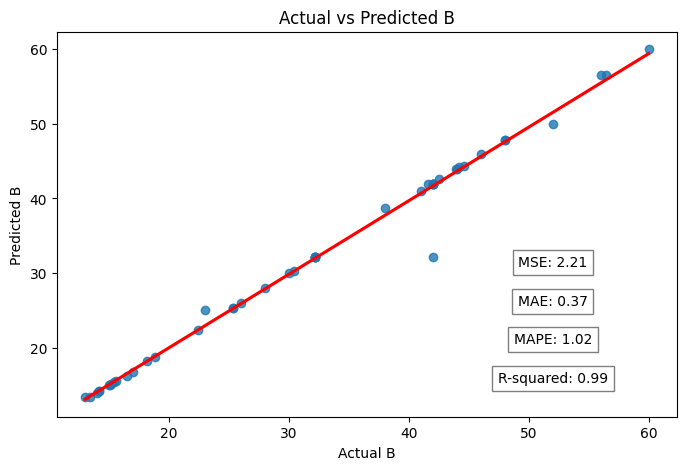

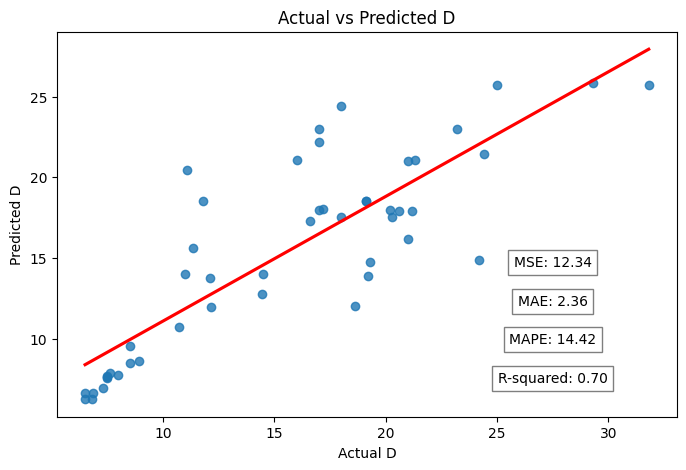

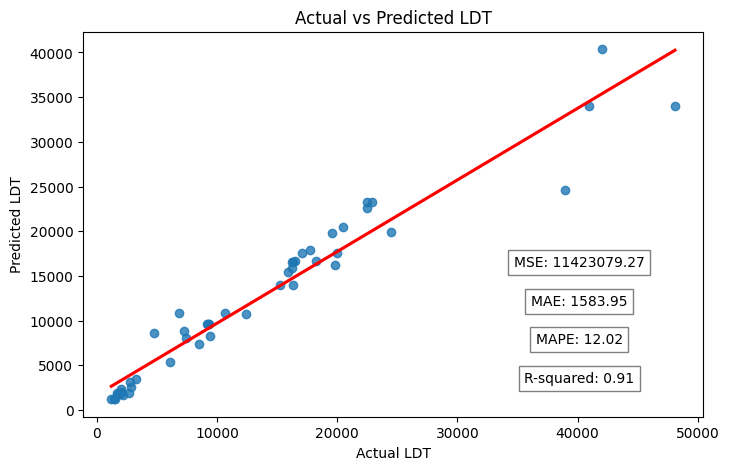

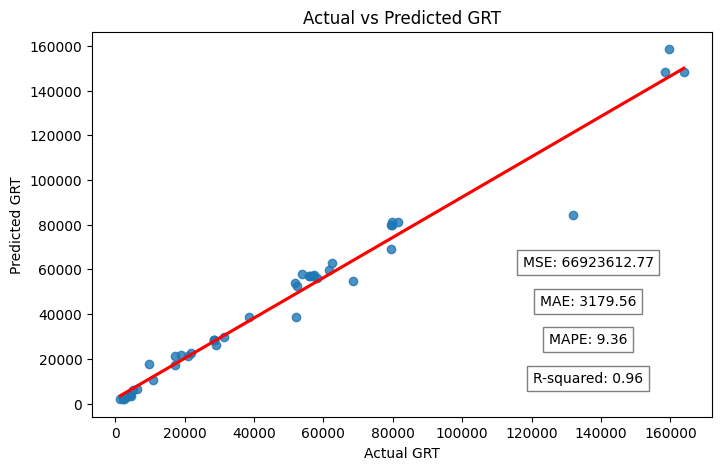

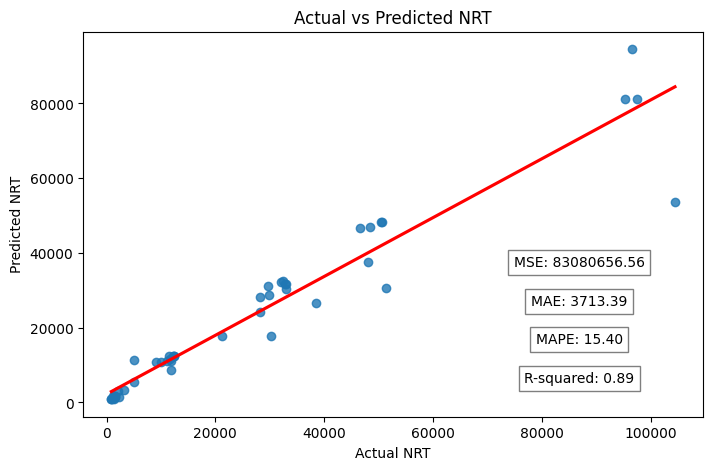

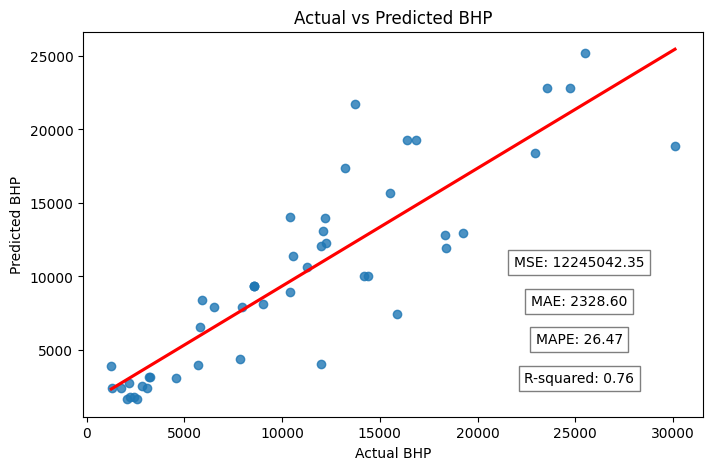

In [5]:
from sklearn.neighbors import KNeighborsRegressor

X = df[['LOA', 'DWT']]
y = df[['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN regressor model
model = KNeighborsRegressor(n_neighbors=2)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
overall_mape = mape.mean()
mae = mean_absolute_error(y_test, y_pred)

# Display the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Overall MAPE: {overall_mape}%')
print(f'Overall MAE: {mae}')

def calculate_metrics(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    return mape, mae, mse

# Actual vs. Predicted values
for i, col in enumerate(['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']):
    plt.figure(figsize=(8, 5))
    sns.regplot(x=y_test[col], y=y_pred[:, i], ci=None, line_kws={'color': 'red'})
    plt.xlabel(f'Actual {col}')
    plt.ylabel(f'Predicted {col}')
    plt.title(f'Actual vs Predicted {col}')
    # Calculate R-squared, MAPE, MAE, MSE values
    r2 = r2_score(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.1, f'R-squared: {r2:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    mape, mae, mse = calculate_metrics(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.2, f'MAPE: {mape:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.3, f'MAE: {mae:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.4, f'MSE: {mse:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Mean Squared Error: 31821870.46570226
R-squared: 0.8568052865783132
Overall MAPE: 13.242181199172114%
Overall MAE: 1787.4090416666668


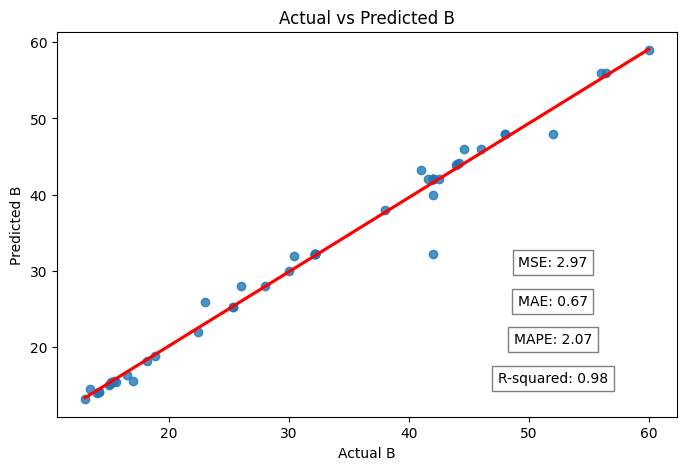

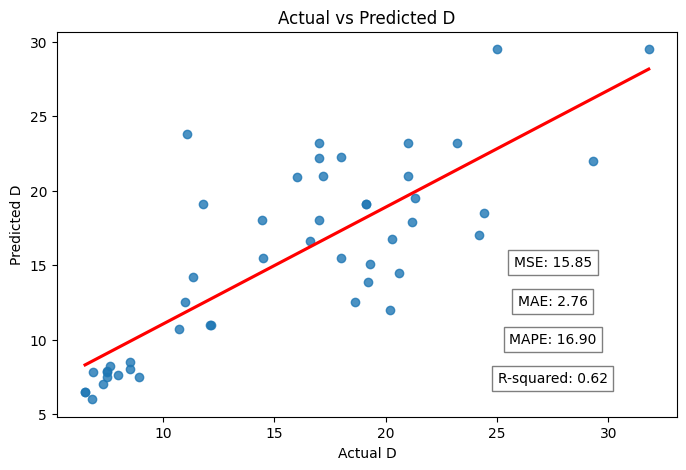

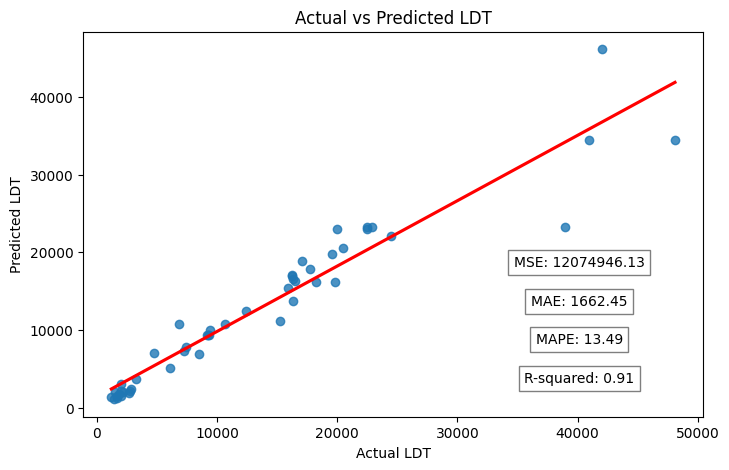

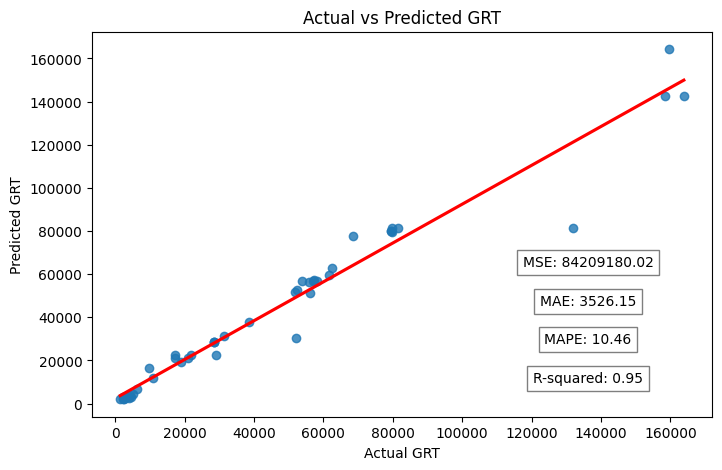

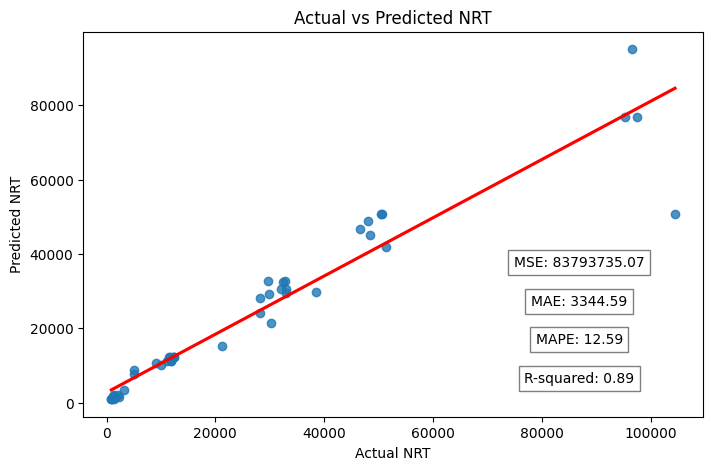

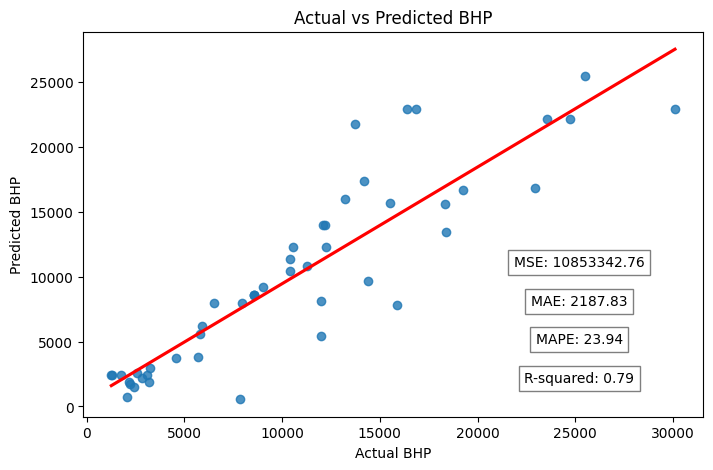

In [6]:
from sklearn.tree import DecisionTreeRegressor

X = df[['LOA', 'DWT']]
y = df[['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree regressor model
model = DecisionTreeRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
overall_mape = mape.mean()
mae = mean_absolute_error(y_test, y_pred)

# Display the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Overall MAPE: {overall_mape}%')
print(f'Overall MAE: {mae}')

def calculate_metrics(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    return mape, mae, mse

# Actual vs. Predicted values
for i, col in enumerate(['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']):
    plt.figure(figsize=(8, 5))
    sns.regplot(x=y_test[col], y=y_pred[:, i], ci=None, line_kws={'color': 'red'})
    plt.xlabel(f'Actual {col}')
    plt.ylabel(f'Predicted {col}')
    plt.title(f'Actual vs Predicted {col}')
    # Calculate R-squared, MAPE, MAE, MSE values
    r2 = r2_score(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.1, f'R-squared: {r2:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    mape, mae, mse = calculate_metrics(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.2, f'MAPE: {mape:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.3, f'MAE: {mae:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.4, f'MSE: {mse:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Mean Squared Error: 8574382.844558349
R-squared: 0.9141763425769399
Overall MAPE: 10.925687531836664%
Overall MAE: 1202.4265037661842


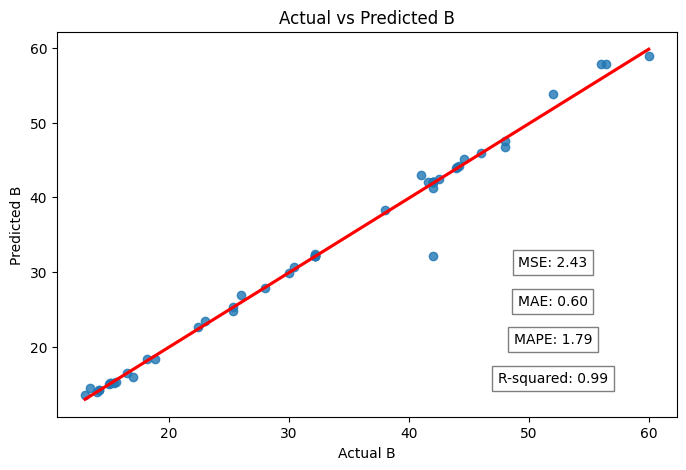

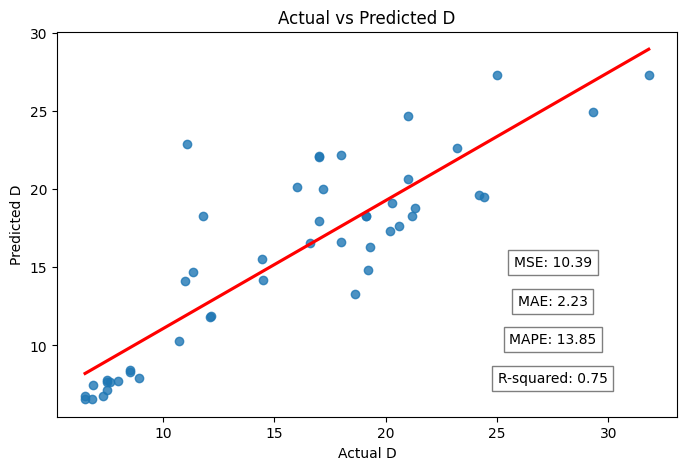

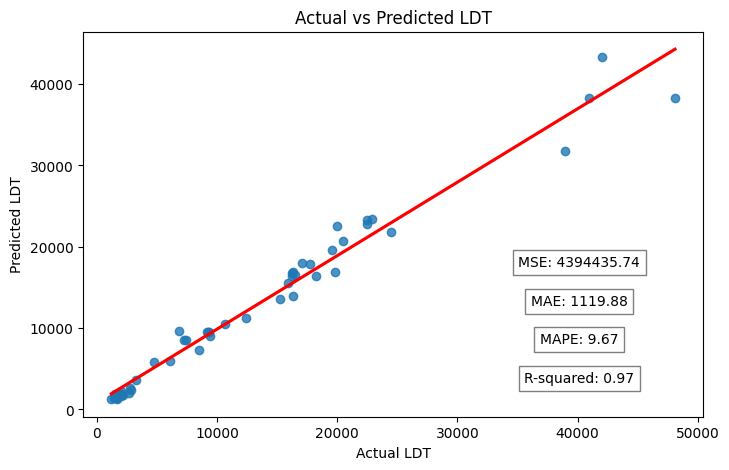

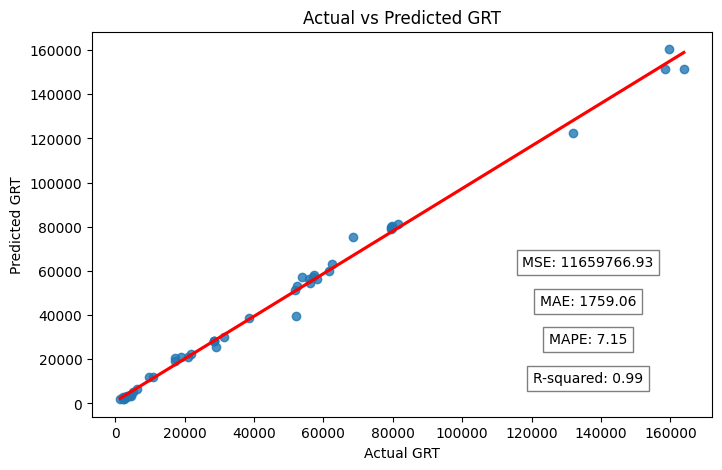

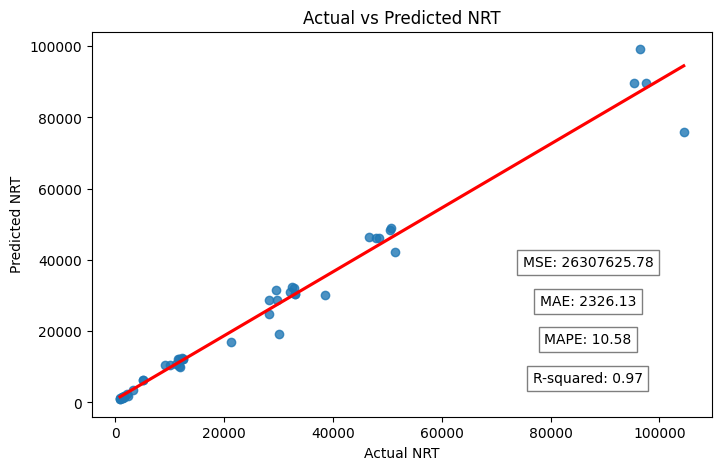

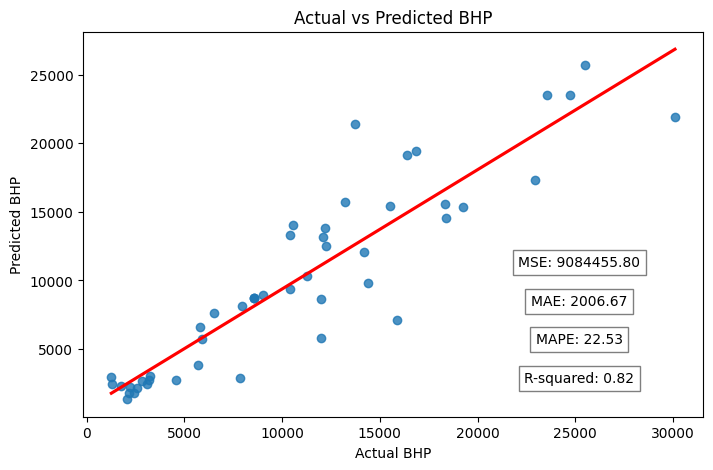

In [7]:
from sklearn.ensemble import RandomForestRegressor

X = df[['LOA', 'DWT']]
y = df[['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest regressor model
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
overall_mape = mape.mean()
mae = mean_absolute_error(y_test, y_pred)

# Display the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Overall MAPE: {overall_mape}%')
print(f'Overall MAE: {mae}')

def calculate_metrics(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    return mape, mae, mse

# Actual vs. Predicted values
for i, col in enumerate(['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']):
    plt.figure(figsize=(8, 5))
    sns.regplot(x=y_test[col], y=y_pred[:, i], ci=None, line_kws={'color': 'red'})
    plt.xlabel(f'Actual {col}')
    plt.ylabel(f'Predicted {col}')
    plt.title(f'Actual vs Predicted {col}')
    # Calculate R-squared, MAPE, MAE, MSE values
    r2 = r2_score(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.1, f'R-squared: {r2:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    mape, mae, mse = calculate_metrics(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.2, f'MAPE: {mape:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.3, f'MAE: {mae:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.4, f'MSE: {mse:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Mean Squared Error: 34670019.57825343
R-squared: 0.8939609620544783
Overall MAPE: 22.126954122768424%
Overall MAE: 2763.3446421677213


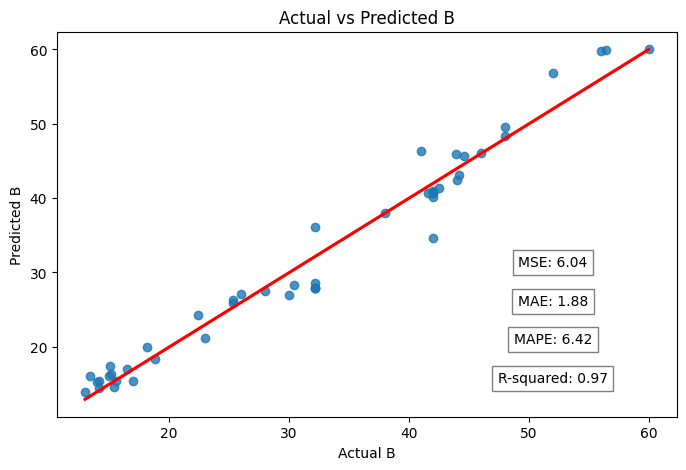

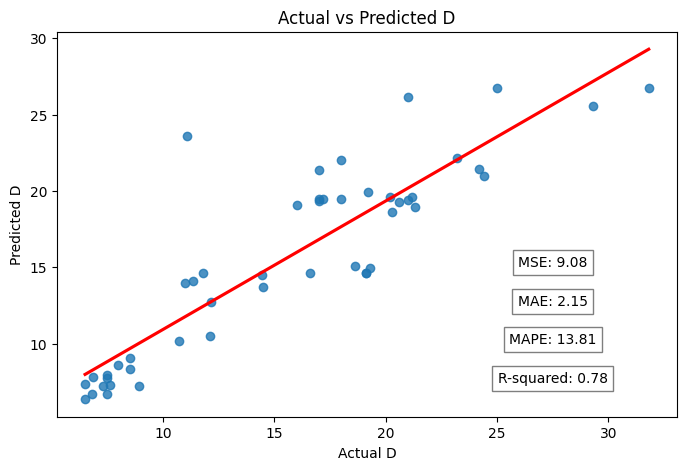

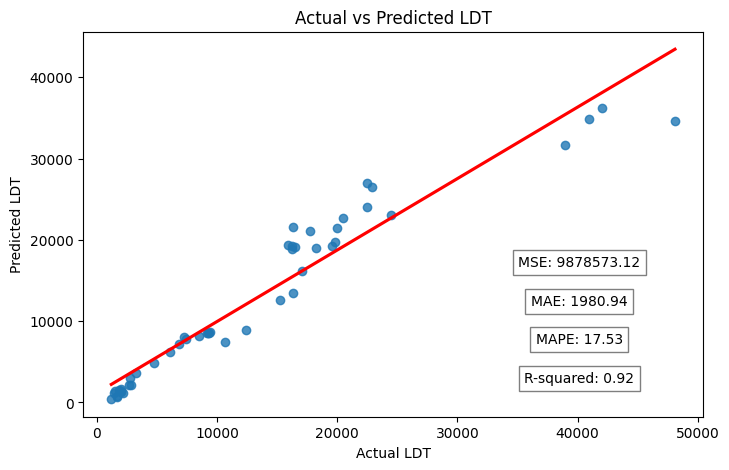

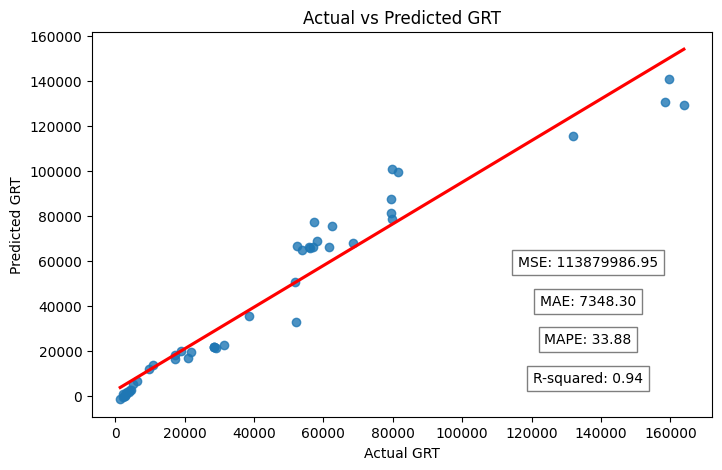

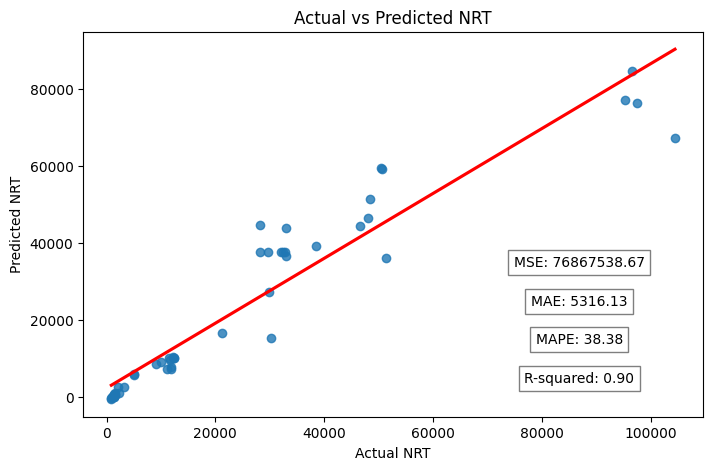

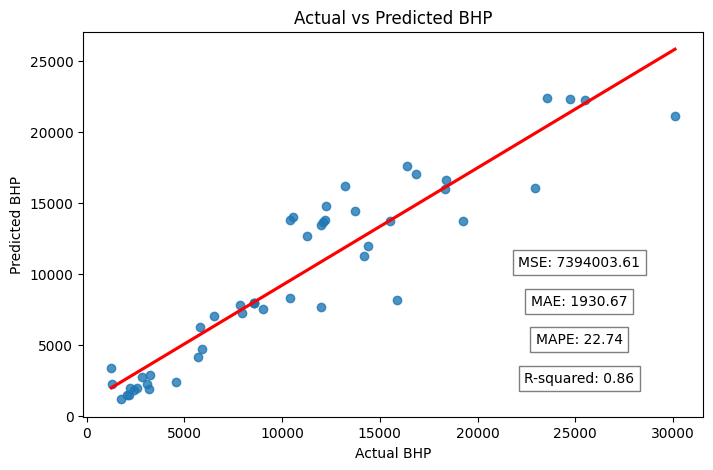

In [8]:
from sklearn.linear_model import Lasso

X = df[['LOA', 'DWT']]
y = df[['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Lasso regressor model
model = Lasso()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
overall_mape = mape.mean()
mae = mean_absolute_error(y_test, y_pred)

# Display the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Overall MAPE: {overall_mape}%')
print(f'Overall MAE: {mae}')

def calculate_metrics(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    return mape, mae, mse

# Actual vs. Predicted values
for i, col in enumerate(['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']):
    plt.figure(figsize=(8, 5))
    sns.regplot(x=y_test[col], y=y_pred[:, i], ci=None, line_kws={'color': 'red'})
    plt.xlabel(f'Actual {col}')
    plt.ylabel(f'Predicted {col}')
    plt.title(f'Actual vs Predicted {col}')
    # Calculate R-squared, MAPE, MAE, MSE values
    r2 = r2_score(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.1, f'R-squared: {r2:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    mape, mae, mse = calculate_metrics(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.2, f'MAPE: {mape:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.3, f'MAE: {mae:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.4, f'MSE: {mse:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Mean Squared Error: 34670057.169013314
R-squared: 0.8937803781224402
Overall MAPE: 22.13280774250317%
Overall MAE: 2763.3422671052426


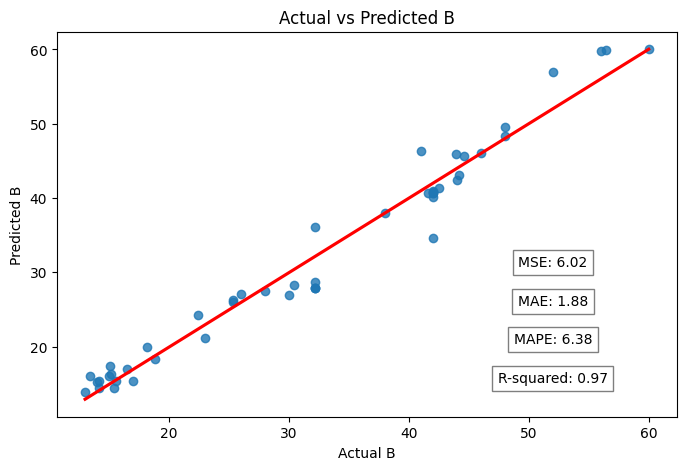

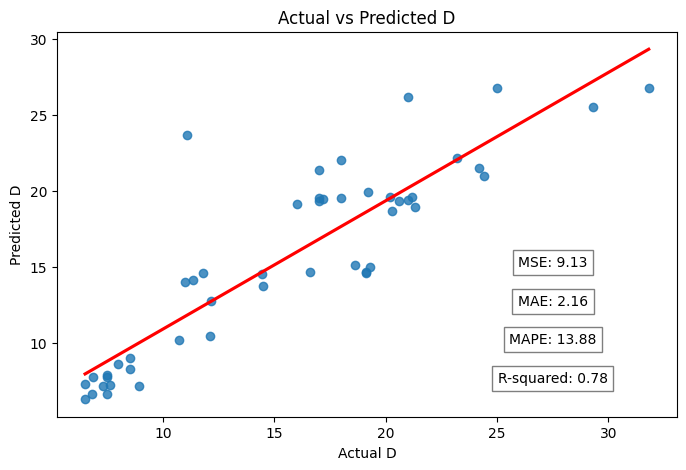

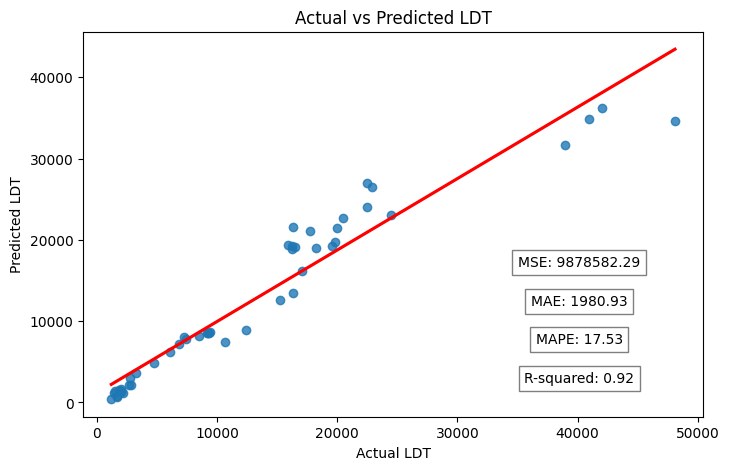

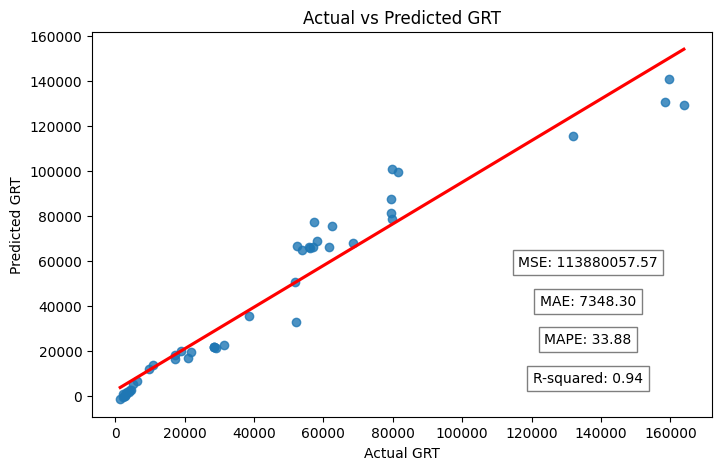

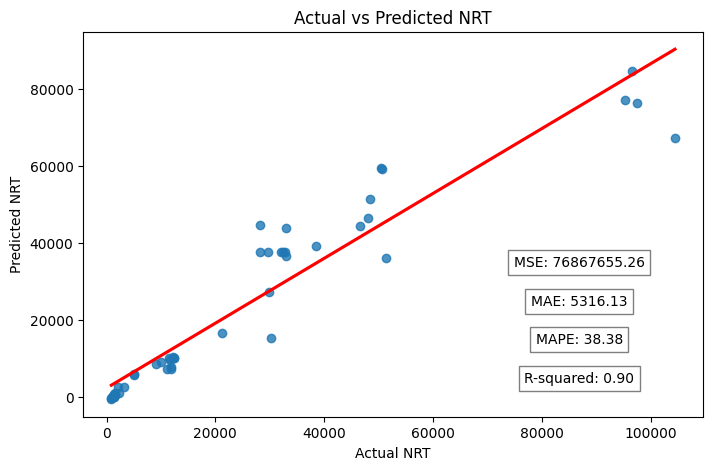

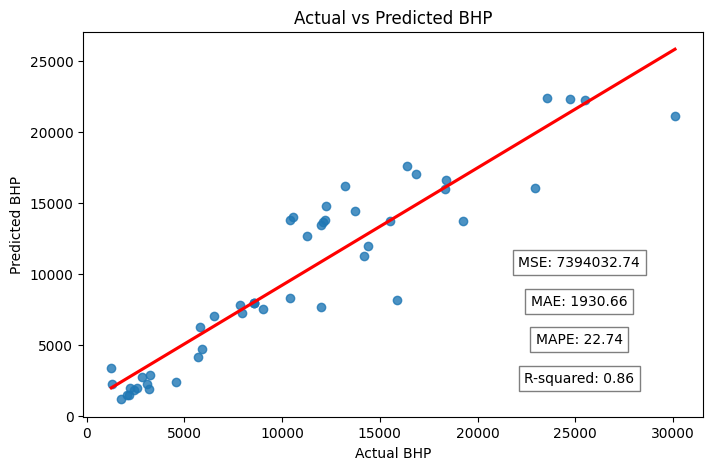

In [9]:
from sklearn.linear_model import Ridge

X = df[['LOA', 'DWT']]
y = df[['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Ridge regressor model
model = Ridge()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
overall_mape = mape.mean()
mae = mean_absolute_error(y_test, y_pred)

# Display the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Overall MAPE: {overall_mape}%')
print(f'Overall MAE: {mae}')

def calculate_metrics(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    return mape, mae, mse

# Actual vs. Predicted values
for i, col in enumerate(['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']):
    plt.figure(figsize=(8, 5))
    sns.regplot(x=y_test[col], y=y_pred[:, i], ci=None, line_kws={'color': 'red'})
    plt.xlabel(f'Actual {col}')
    plt.ylabel(f'Predicted {col}')
    plt.title(f'Actual vs Predicted {col}')
    # Calculate R-squared, MAPE, MAE, MSE values
    r2 = r2_score(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.1, f'R-squared: {r2:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    mape, mae, mse = calculate_metrics(y_test[col], y_pred[:, i])
    plt.text(0.8, 0.2, f'MAPE: {mape:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.3, f'MAE: {mae:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.8, 0.4, f'MSE: {mse:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.show()

In [10]:
from sklearn.svm import SVR

X = df[['LOA', 'DWT']]
y = df[['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM regressor model
model = SVR()

# Initialize lists to store predictions and true values for each column
y_pred_list = []
y_true_list = []

# Train and predict for each column separately
for col in y.columns:
    # Train the model
    model.fit(X_train, y_train[col])

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Append predictions and true values to the lists
    y_pred_list.append(y_pred)
    y_true_list.append(y_test[col])

# Convert lists to arrays
y_pred_array = np.array(y_pred_list).T
y_true_array = np.array(y_true_list).T

# Evaluate the model
mse = mean_squared_error(y_true_array, y_pred_array)
r2 = r2_score(y_true_array, y_pred_array)
mape = np.mean(np.abs((y_true_array - y_pred_array) / y_true_array)) * 100
overall_mape = mape.mean()
mae = mean_absolute_error(y_true_array, y_pred_array)

# Display the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Overall MAPE: {overall_mape}%')
print(f'Overall MAE: {mae}')

Mean Squared Error: 549043680.5818428
R-squared: 0.15869386123111376
Overall MAPE: 128.06961641467052%
Overall MAE: 11271.493475078933


In [12]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Initialize the AdaBoost regressor model
model = AdaBoostRegressor(n_estimators=50, random_state=42)

# Initialize lists to store results for each output variable
mse_list, r2_list, mape_list, mae_list = [], [], [], []

# Train and evaluate the model for each output variable
for i, output_var in enumerate(['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']):
    y_train_single = y_train[output_var]
    y_test_single = y_test[output_var]

    # Train the model
    model.fit(X_train, y_train_single)

    # Make predictions on the test set
    y_pred_single = model.predict(X_test)

    # Evaluate the model
    mse_single = mean_squared_error(y_test_single, y_pred_single)
    r2_single = r2_score(y_test_single, y_pred_single)
    mape_single = np.mean(np.abs((y_test_single - y_pred_single) / y_test_single)) * 100
    mae_single = mean_absolute_error(y_test_single, y_pred_single)

    # Append results to lists
    mse_list.append(mse_single)
    r2_list.append(r2_single)
    mape_list.append(mape_single)
    mae_list.append(mae_single)

    # Display the evaluation metrics for each output variable
    print(f'Mean Squared Error ({output_var}): {mse_single}')
    print(f'R-squared ({output_var}): {r2_single}')
    print(f'MAPE ({output_var}): {mape_single}%')
    print(f'MAE ({output_var}): {mae_single}')
    print('-' * 50)

# Display the overall metrics
print(f'Overall Mean Squared Error: {np.mean(mse_list)}')
print(f'Overall R-squared: {np.mean(r2_list)}')
print(f'Overall MAPE: {np.mean(mape_list)}%')
print(f'Overall MAE: {np.mean(mae_list)}')

Mean Squared Error (B): 3.9571986693476755
R-squared (B): 0.9783955346497375
MAPE (B): 3.642920626307992%
MAE (B): 1.1201547979577986
--------------------------------------------------
Mean Squared Error (D): 8.962768973562634
R-squared (D): 0.7845050710281437
MAPE (D): 14.581862444464381%
MAE (D): 2.2225929266107562
--------------------------------------------------
Mean Squared Error (LDT): 2838758.77660195
R-squared (LDT): 0.9781359823326348
MAPE (LDT): 16.491569977692613%
MAE (LDT): 1122.7842389197424
--------------------------------------------------
Mean Squared Error (GRT): 21622187.02088288
R-squared (GRT): 0.9880520854235582
MAPE (GRT): 35.99914186380489%
MAE (GRT): 3364.0400755097526
--------------------------------------------------
Mean Squared Error (NRT): 37541934.12480966
R-squared (NRT): 0.950077298399032
MAPE (NRT): 49.15845094398505%
MAE (NRT): 3529.3399211169417
--------------------------------------------------
Mean Squared Error (BHP): 9404826.129999304
R-squared (

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting regressor model
model = GradientBoostingRegressor(n_estimators=50, random_state=42)

# Initialize lists to store results for each output variable
mse_list, r2_list, mape_list, mae_list = [], [], [], []

# Train and evaluate the model for each output variable
for i, output_var in enumerate(['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']):
    y_train_single = y_train[output_var]
    y_test_single = y_test[output_var]

    # Train the model
    model.fit(X_train, y_train_single)

    # Make predictions on the test set
    y_pred_single = model.predict(X_test)

    # Evaluate the model
    mse_single = mean_squared_error(y_test_single, y_pred_single)
    r2_single = r2_score(y_test_single, y_pred_single)
    mape_single = np.mean(np.abs((y_test_single - y_pred_single) / y_test_single)) * 100
    mae_single = mean_absolute_error(y_test_single, y_pred_single)

    # Append results to lists
    mse_list.append(mse_single)
    r2_list.append(r2_single)
    mape_list.append(mape_single)
    mae_list.append(mae_single)

    # Display the evaluation metrics for each output variable
    print(f'Mean Squared Error ({output_var}): {mse_single}')
    print(f'R-squared ({output_var}): {r2_single}')
    print(f'MAPE ({output_var}): {mape_single}%')
    print(f'MAE ({output_var}): {mae_single}')
    print('-' * 50)

# Display the overall metrics
print(f'Overall Mean Squared Error: {np.mean(mse_list)}')
print(f'Overall R-squared: {np.mean(r2_list)}')
print(f'Overall MAPE: {np.mean(mape_list)}%')
print(f'Overall MAE: {np.mean(mae_list)}')

Mean Squared Error (B): 2.140547593721045
R-squared (B): 0.9883136051072318
MAPE (B): 1.124470946558973%
MAE (B): 0.3750895920087891
--------------------------------------------------
Mean Squared Error (D): 10.51898149008888
R-squared (D): 0.7470885196584574
MAPE (D): 13.827979694314116%
MAE (D): 2.194285579728341
--------------------------------------------------
Mean Squared Error (LDT): 2416989.0866065244
R-squared (LDT): 0.981384437266399
MAPE (LDT): 8.901935273411262%
MAE (LDT): 910.4810915415823
--------------------------------------------------
Mean Squared Error (GRT): 14276906.899376197
R-squared (GRT): 0.99211091533503
MAPE (GRT): 7.962129333604094%
MAE (GRT): 1936.614276054499
--------------------------------------------------
Mean Squared Error (NRT): 45450662.95182771
R-squared (NRT): 0.9395603892818409
MAPE (NRT): 15.581909683925337%
MAE (NRT): 2927.160679332294
--------------------------------------------------
Mean Squared Error (BHP): 7551025.5923318155
R-squared (BHP

In [14]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=50, random_state=42)

# Initialize lists to store results for each output variable
mse_list, r2_list, mape_list, mae_list = [], [], [], []

# Train and evaluate the model for each output variable
for i, output_var in enumerate(['B', 'D', 'LDT', 'GRT', 'NRT', 'BHP']):
    y_train_single = y_train[output_var]
    y_test_single = y_test[output_var]

    # Train the model
    model.fit(X_train, y_train_single)

    # Make predictions on the test set
    y_pred_single = model.predict(X_test)

    # Evaluate the model
    mse_single = mean_squared_error(y_test_single, y_pred_single)
    r2_single = r2_score(y_test_single, y_pred_single)
    mape_single = np.mean(np.abs((y_test_single - y_pred_single) / y_test_single)) * 100
    mae_single = mean_absolute_error(y_test_single, y_pred_single)

    # Append results to lists
    mse_list.append(mse_single)
    r2_list.append(r2_single)
    mape_list.append(mape_single)
    mae_list.append(mae_single)

    # Display the evaluation metrics for each output variable
    print(f'Mean Squared Error ({output_var}): {mse_single}')
    print(f'R-squared ({output_var}): {r2_single}')
    print(f'MAPE ({output_var}): {mape_single}%')
    print(f'MAE ({output_var}): {mae_single}')
    print('-' * 50)

# Display the overall metrics
print(f'Overall Mean Squared Error: {np.mean(mse_list)}')
print(f'Overall R-squared: {np.mean(r2_list)}')
print(f'Overall MAPE: {np.mean(mape_list)}%')
print(f'Overall MAE: {np.mean(mae_list)}')

Mean Squared Error (B): 2.192310071545665
R-squared (B): 0.988031006038535
MAPE (B): 1.285013895950398%
MAE (B): 0.40828406572341897
--------------------------------------------------
Mean Squared Error (D): 14.550043915172083
R-squared (D): 0.6501683029780164
MAPE (D): 15.103321972032655%
MAE (D): 2.4824165423711144
--------------------------------------------------
Mean Squared Error (LDT): 3613595.6450632066
R-squared (LDT): 0.9721682167299365
MAPE (LDT): 10.000381365426518%
MAE (LDT): 1057.3493016560872
--------------------------------------------------
Mean Squared Error (GRT): 30663367.058716416
R-squared (GRT): 0.9830561409033329
MAPE (GRT): 7.508825705110127%
MAE (GRT): 2349.707056681315
--------------------------------------------------
Mean Squared Error (NRT): 51031433.955278754
R-squared (NRT): 0.932139163604379
MAPE (NRT): 11.498315370863997%
MAE (NRT): 3178.408056894938
--------------------------------------------------
Mean Squared Error (BHP): 11345012.909232846
R-squar

Epoch 1/1800
5/5 [==============================] - 2s 84ms/step - loss: 702345088.0000 - mae: 12947.0439 - val_loss: 1008893952.0000 - val_mae: 15705.3682
Epoch 2/1800
5/5 [==============================] - 0s 19ms/step - loss: 702342656.0000 - mae: 12947.0107 - val_loss: 1008890688.0000 - val_mae: 15705.3281
Epoch 3/1800
5/5 [==============================] - 0s 20ms/step - loss: 702340032.0000 - mae: 12946.9717 - val_loss: 1008887040.0000 - val_mae: 15705.2822
Epoch 4/1800
5/5 [==============================] - 0s 33ms/step - loss: 702336832.0000 - mae: 12946.9248 - val_loss: 1008882944.0000 - val_mae: 15705.2295
Epoch 5/1800
5/5 [==============================] - 0s 18ms/step - loss: 702333824.0000 - mae: 12946.8721 - val_loss: 1008878400.0000 - val_mae: 15705.1650
Epoch 6/1800
5/5 [==============================] - 0s 20ms/step - loss: 702330304.0000 - mae: 12946.8096 - val_loss: 1008873344.0000 - val_mae: 15705.0879
Epoch 7/1800
5/5 [==============================] - 0s 21ms/step

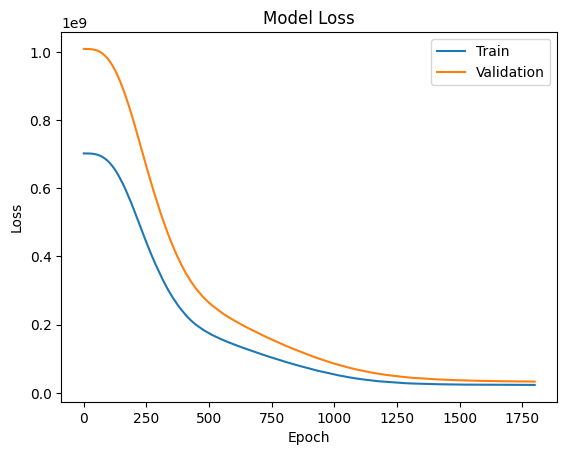

In [24]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=2))  # Two input features (LOA, DWT)
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='linear'))  # Six output targets (B, D, LDT, NRT, GRT, BHP)

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

history = model.fit(X_train_scaled, y_train, epochs=1800, batch_size=32, validation_split=0.2)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()